In [1]:
import geopandas as gpd
import pandas as pd

## Loading street points for Pasig

In [2]:
df = pd.read_csv('data/csv/newPasig_saved_coordinates.csv')

In [3]:
geometry = gpd.points_from_xy(df['X'], df['Y'], crs="EPSG:4326")
street_points = gpd.GeoDataFrame(geometry=geometry)  
street_points

,geometry
0,POINT (121.06392 14.61466)
1,POINT (121.06519 14.61323)
2,POINT (121.06445 14.60089)
3,POINT (121.06548 14.56409)
4,POINT (121.08611 14.60407)
...,...
475,POINT (121.08500 14.58888)
476,POINT (121.06646 14.56766)
477,POINT (121.08537 14.54345)
478,POINT (121.06575 14.56597)


In [4]:
street_points.insert(0, 'point_id', range(0, 0 + len(street_points)))

## Display Paranaque map

<AxesSubplot:>

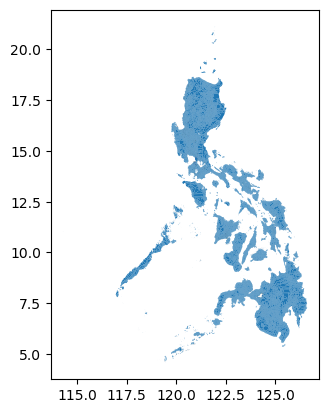

In [5]:
philippines = gpd.read_file('maps/phl_admbnda_adm4_psa_namria_20231106.zip')
philippines.plot()

In [6]:
philippines.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

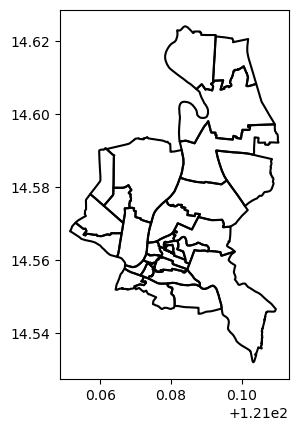

In [7]:
# pasig = philippines[philippines['ADM3_EN'] == 'City of Pasig']
pasig = philippines[philippines['ADM3_EN'] == 'City of Pasig']
pasig.boundary.plot(edgecolor='black')

In [8]:
pasig.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
pasig.shape

(30, 18)

In [10]:
pasig.head()

,ADM4_EN,ADM4_PCODE,ADM4_REF,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,AREA_SQKM,geometry
34727,Bagong Ilog,PH1307403001,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.044006,0.000102,1.212769,"POLYGON ((121.06826 14.57439, 121.06830 14.574..."
34728,Bagong Katipunan,PH1307403002,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.008178,0.000002,0.022305,"POLYGON ((121.07557 14.55938, 121.07565 14.559..."
34729,Bambang,PH1307403003,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.037444,0.000044,0.521039,"POLYGON ((121.08183 14.55734, 121.08205 14.557..."
34730,Buting,PH1307403004,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.025904,0.000029,0.348487,"POLYGON ((121.06733 14.55742, 121.06791 14.557..."
34731,Caniogan,PH1307403005,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.048018,0.000088,1.043965,"POLYGON ((121.07887 14.57603, 121.07900 14.575..."


## Plotting street points onto the map

<AxesSubplot:>

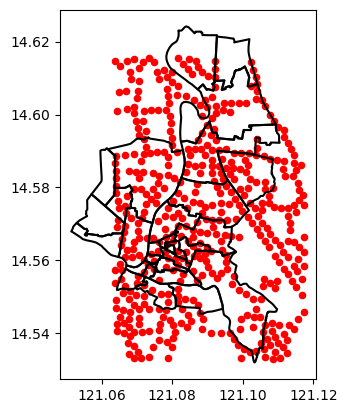

In [11]:
base = pasig.boundary.plot(edgecolor='black')
street_points.plot(ax=base, markersize=20, color='red')

In [12]:
clipped = gpd.clip(street_points, pasig)
clipped

,point_id,geometry
448,448,POINT (121.08168 14.54853)
414,414,POINT (121.07888 14.54862)
447,447,POINT (121.08157 14.55035)
413,413,POINT (121.07891 14.55074)
389,389,POINT (121.07679 14.55090)
...,...,...
23,23,POINT (121.08724 14.61291)
479,479,POINT (121.08678 14.61478)
473,473,POINT (121.08482 14.61516)
450,450,POINT (121.08302 14.61382)


<AxesSubplot:>

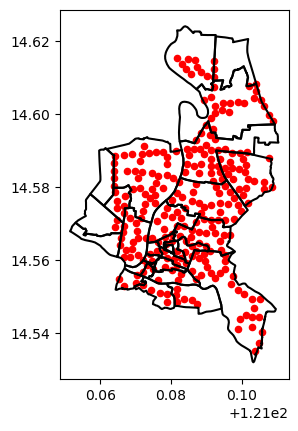

In [13]:
base = pasig.boundary.plot(edgecolor='black')
clipped.plot(ax=base, markersize=20, color='red')

In [14]:
len(clipped)

266

In [15]:
clipped.geometry.y

448    14.548533
414    14.548625
447    14.550355
413    14.550738
389    14.550901
         ...    
23     14.612915
479    14.614782
473    14.615163
450    14.613821
435    14.615457
Length: 266, dtype: float64

In [16]:
df = pd.DataFrame({'X': clipped.geometry.x, 'Y': clipped.geometry.y})
df.to_csv('data/csv/pasig_filtered_coordinates.csv', index=False)

## Analyzing street point data

In [17]:
joined = gpd.sjoin(street_points, pasig, how='left', predicate='within')
joined.head()

,point_id,geometry,index_right,ADM4_EN,ADM4_PCODE,ADM4_REF,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,AREA_SQKM
0,0,POINT (121.06392 14.61466),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,POINT (121.06519 14.61323),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,POINT (121.06445 14.60089),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,POINT (121.06548 14.56409),34727.0,Bagong Ilog,PH1307403001,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.044006,0.000102,1.212769
4,4,POINT (121.08611 14.60407),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
joined.shape

(480, 20)

In [19]:
joined = gpd.sjoin(pasig, street_points, how='left', predicate='contains')
joined.head()

,ADM4_EN,ADM4_PCODE,ADM4_REF,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,AREA_SQKM,geometry,index_right,point_id
34727,Bagong Ilog,PH1307403001,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.044006,0.000102,1.212769,"POLYGON ((121.06826 14.57439, 121.06830 14.574...",10.0,10.0
34727,Bagong Ilog,PH1307403001,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.044006,0.000102,1.212769,"POLYGON ((121.06826 14.57439, 121.06830 14.574...",272.0,272.0
34727,Bagong Ilog,PH1307403001,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.044006,0.000102,1.212769,"POLYGON ((121.06826 14.57439, 121.06830 14.574...",341.0,341.0
34727,Bagong Ilog,PH1307403001,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.044006,0.000102,1.212769,"POLYGON ((121.06826 14.57439, 121.06830 14.574...",319.0,319.0
34727,Bagong Ilog,PH1307403001,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.044006,0.000102,1.212769,"POLYGON ((121.06826 14.57439, 121.06830 14.574...",318.0,318.0


In [20]:
joined.shape

(270, 20)

In [21]:
joined[joined['ADM4_EN'] == 'Pineda']

,ADM4_EN,ADM4_PCODE,ADM4_REF,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,AREA_SQKM,geometry,index_right,point_id
34742,Pineda,PH1307403016,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.042084,0.000049,0.581491,"POLYGON ((121.05299 14.57029, 121.05301 14.570...",478.0,478.0


In [22]:
joined['ADM4_EN'].value_counts()

Ugong                 36
Pinagbuhatan          31
Rosario               26
Maybunga              26
Santa Lucia           22
Manggahan             20
San Miguel            17
Bagong Ilog           15
Santolan              11
Caniogan              10
Kalawaan               6
Oranbo                 6
Buting                 5
San Nicolas (Pob.)     5
San Joaquin            4
Palatiw                4
Bambang                3
Dela Paz               3
Sumilang               3
Santo Tomas            3
Kapitolyo              2
Malinao                2
Sagad                  2
Kapasigan              2
San Jose               1
Santa Cruz             1
Santa Rosa             1
San Antonio            1
Bagong Katipunan       1
Pineda                 1
Name: ADM4_EN, dtype: int64

In [23]:
average_images = joined.groupby('ADM4_EN')['point_id'].count().mean()
average_images

8.866666666666667

In [24]:
std_images = joined.groupby('ADM4_EN')['point_id'].count().std()
std_images

10.30143389193393

In [25]:
grouped = joined.groupby('ADM4_EN')['point_id'].count().sort_values(ascending=True)
grouped

ADM4_EN
Santa Rosa             0
Bagong Katipunan       0
San Antonio            0
Santa Cruz             0
Pineda                 1
San Jose               1
Kapasigan              2
Kapitolyo              2
Malinao                2
Sagad                  2
Santo Tomas            3
Sumilang               3
Bambang                3
Dela Paz               3
San Joaquin            4
Palatiw                4
Buting                 5
San Nicolas (Pob.)     5
Kalawaan               6
Oranbo                 6
Caniogan              10
Santolan              11
Bagong Ilog           15
San Miguel            17
Manggahan             20
Santa Lucia           22
Rosario               26
Maybunga              26
Pinagbuhatan          31
Ugong                 36
Name: point_id, dtype: int64

Text(0.5, 1.0, 'Number of images per barangay in Pasig')

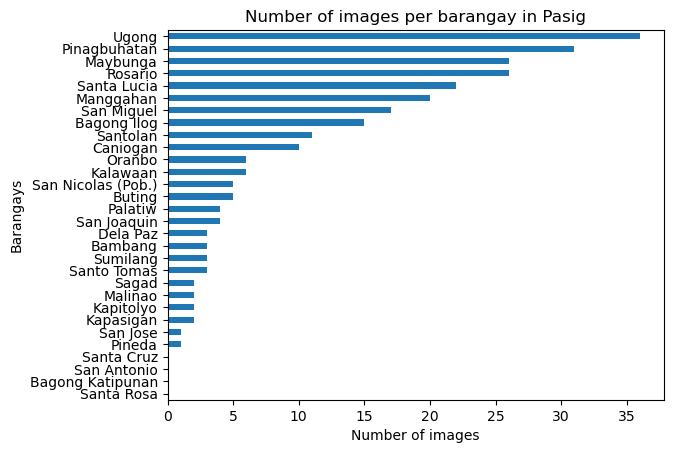

In [26]:
ax = grouped.plot.barh()
ax.set_xlabel('Number of images')
ax.set_ylabel('Barangays')
ax.set_title('Number of images per barangay in Pasig')

In [27]:
total_street_points = joined.groupby('ADM4_EN')['point_id'].count().sum()
total_street_points

266

In [28]:
pasig.set_index('ADM4_EN', inplace=True)
pasig.head()

,ADM4_PCODE,ADM4_REF,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,AREA_SQKM,geometry
ADM4_EN,,,,,,,,,,,,,,,,,
Bagong Ilog,PH1307403001,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.044006,0.000102,1.212769,"POLYGON ((121.06826 14.57439, 121.06830 14.574..."
Bagong Katipunan,PH1307403002,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.008178,0.000002,0.022305,"POLYGON ((121.07557 14.55938, 121.07565 14.559..."
Bambang,PH1307403003,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.037444,0.000044,0.521039,"POLYGON ((121.08183 14.55734, 121.08205 14.557..."
Buting,PH1307403004,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.025904,0.000029,0.348487,"POLYGON ((121.06733 14.55742, 121.06791 14.557..."
Caniogan,PH1307403005,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.048018,0.000088,1.043965,"POLYGON ((121.07887 14.57603, 121.07900 14.575..."


In [29]:
# pasig['streetimage_count'] = joined['ADM4_EN'].value_counts()
pasig['streetimage_count'] = joined.groupby('ADM4_EN')['point_id'].count().sort_values(ascending=False)
# pasig['streetimage_count'] = y
pasig.head()

C:\Users\Daniel\miniconda3\lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,ADM4_PCODE,ADM4_REF,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,AREA_SQKM,geometry,streetimage_count
ADM4_EN,,,,,,,,,,,,,,,,,,
Bagong Ilog,PH1307403001,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.044006,0.000102,1.212769,"POLYGON ((121.06826 14.57439, 121.06830 14.574...",15
Bagong Katipunan,PH1307403002,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.008178,0.000002,0.022305,"POLYGON ((121.07557 14.55938, 121.07565 14.559...",0
Bambang,PH1307403003,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.037444,0.000044,0.521039,"POLYGON ((121.08183 14.55734, 121.08205 14.557...",3
Buting,PH1307403004,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.025904,0.000029,0.348487,"POLYGON ((121.06733 14.55742, 121.06791 14.557...",5
Caniogan,PH1307403005,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.048018,0.000088,1.043965,"POLYGON ((121.07887 14.57603, 121.07900 14.575...",10


<AxesSubplot:>

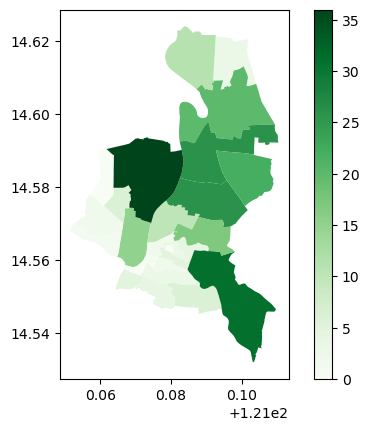

In [30]:
pasig.plot(column='streetimage_count', cmap='Greens', legend=True)

In [31]:
pasig.reset_index(inplace=True)
pasig.head()

,ADM4_EN,ADM4_PCODE,ADM4_REF,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,AREA_SQKM,geometry,streetimage_count
0,Bagong Ilog,PH1307403001,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.044006,0.000102,1.212769,"POLYGON ((121.06826 14.57439, 121.06830 14.574...",15
1,Bagong Katipunan,PH1307403002,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.008178,0.000002,0.022305,"POLYGON ((121.07557 14.55938, 121.07565 14.559...",0
2,Bambang,PH1307403003,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.037444,0.000044,0.521039,"POLYGON ((121.08183 14.55734, 121.08205 14.557...",3
3,Buting,PH1307403004,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.025904,0.000029,0.348487,"POLYGON ((121.06733 14.55742, 121.06791 14.557...",5
4,Caniogan,PH1307403005,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.048018,0.000088,1.043965,"POLYGON ((121.07887 14.57603, 121.07900 14.575...",10


In [32]:
df = pd.read_csv('data/csv/pasig_buy_model_completed_data.csv')

In [ ]:
df.drop_duplicates(subset=['link'], keep='first')

In [33]:


# Load your properties dataset (assuming it's in a CSV file)
# Replace 'properties.csv' with your actual file path
properties_df = df
# Create a GeoDataFrame for properties
properties_gdf = gpd.GeoDataFrame(properties_df,
                                   geometry=gpd.points_from_xy(properties_df['longitude'],
                                                               properties_df['latitude']),
                                   crs='EPSG:4326')  # Specify the coordinate reference system

# Perform a spatial join
joined_gdf = gpd.sjoin(properties_gdf, pasig, how='inner', op='within')

# The 'ADM4_EN' column in 'joined_gdf' contains the city names
# You can create a new column in 'properties_df' to store the city information
properties_df['barangay'] = joined_gdf['ADM4_EN']

# Now 'properties_df' has an additional 'city' column with the matched city names
print(properties_df.head())



                                                link unit/floor number  \
0  https://www.lamudi.com.ph/studio-condo-unit-fo...              1418   
1  https://www.lamudi.com.ph/3-pdc-discount-promo...       20/F Unit H   
2  https://www.lamudi.com.ph/studio-condo-unit-fo...               NaN   
3  https://www.lamudi.com.ph/for-sale-spacious-co...               NaN   
4  https://www.lamudi.com.ph/studio-condo-unit-fo...          05F-0025   

   car spaces  bedrooms  baths  floor area floor        condominium name  \
0         1.0       1.0    1.0       21.00  14th      Olin at Jade Drive   
1         NaN       2.0    2.0      104.00   NaN               The Fifth   
2         NaN       1.0    1.0       30.00   NaN                 Portico   
3         1.0       1.0    2.0      108.00   NaN  The Velaris Residences   
4         NaN       1.0    1.0       21.37   NaN                Spectrum   

  available from  cctv  ...  recreational_avg_distance  \
0     01/12/2029   1.0  ...             

C:\Users\Daniel\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [34]:
properties_per_city = properties_df.groupby('barangay').size().reset_index(name='property_count')

print(properties_per_city)

        barangay  property_count
0    Bagong Ilog              39
1       Caniogan               4
2       Kalawaan               6
3      Kapitolyo              47
4      Manggahan              11
5       Maybunga               4
6         Oranbo             307
7   Pinagbuhatan               7
8        Rosario              92
9    San Antonio              76
10   San Joaquin              14
11    San Miguel              43
12   Santa Lucia               3
13      Santolan               5
14         Ugong             455


In [35]:
# Calculate the average property price per city
average_price_per_city = joined_gdf.groupby('ADM4_EN')['price'].mean().reset_index()

print(average_price_per_city)

         ADM4_EN         price
0    Bagong Ilog  1.050813e+07
1       Caniogan  1.102325e+07
2       Kalawaan  4.485925e+06
3      Kapitolyo  2.005228e+07
4      Manggahan  3.249278e+07
5       Maybunga  2.676250e+07
6         Oranbo  2.044492e+07
7   Pinagbuhatan  7.477094e+06
8        Rosario  2.729539e+07
9    San Antonio  1.006866e+07
10   San Joaquin  5.861090e+06
11    San Miguel  2.027398e+07
12   Santa Lucia  7.254350e+06
13      Santolan  5.143800e+06
14         Ugong  1.840930e+07


In [36]:
pasig

,ADM4_EN,ADM4_PCODE,ADM4_REF,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,AREA_SQKM,geometry,streetimage_count
0,Bagong Ilog,PH1307403001,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.044006,0.000102,1.212769,"POLYGON ((121.06826 14.57439, 121.06830 14.574...",15
1,Bagong Katipunan,PH1307403002,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.008178,0.000002,0.022305,"POLYGON ((121.07557 14.55938, 121.07565 14.559...",0
2,Bambang,PH1307403003,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.037444,0.000044,0.521039,"POLYGON ((121.08183 14.55734, 121.08205 14.557...",3
3,Buting,PH1307403004,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.025904,0.000029,0.348487,"POLYGON ((121.06733 14.55742, 121.06791 14.557...",5
4,Caniogan,PH1307403005,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.048018,0.000088,1.043965,"POLYGON ((121.07887 14.57603, 121.07900 14.575...",10
5,Dela Paz,PH1307403006,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.060903,0.000110,1.313738,"POLYGON ((121.09324 14.62132, 121.09371 14.621...",3
6,Kalawaan,PH1307403007,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.043051,0.000085,1.007688,"POLYGON ((121.08089 14.55377, 121.08153 14.553...",6
7,Kapasigan,PH1307403008,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.015499,0.000013,0.156590,"POLYGON ((121.07647 14.56461, 121.07650 14.564...",2
8,Kapitolyo,PH1307403009,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.042286,0.000085,1.017210,"POLYGON ((121.05816 14.57730, 121.05870 14.576...",2
9,Malinao,PH1307403010,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.026873,0.000020,0.241379,"POLYGON ((121.08060 14.55974, 121.08047 14.559...",2


In [37]:
# Merge the datasets based on the common column ('ADM4_EN')
merged_gdf = pasig.merge(average_price_per_city, on='ADM4_EN', how='left')

# Now 'merged_gdf' contains both city geometries and average property prices
print(merged_gdf)

               ADM4_EN    ADM4_PCODE ADM4_REF        ADM3_EN ADM3_PCODE  \
0          Bagong Ilog  PH1307403001     None  City of Pasig  PH1307403   
1     Bagong Katipunan  PH1307403002     None  City of Pasig  PH1307403   
2              Bambang  PH1307403003     None  City of Pasig  PH1307403   
3               Buting  PH1307403004     None  City of Pasig  PH1307403   
4             Caniogan  PH1307403005     None  City of Pasig  PH1307403   
5             Dela Paz  PH1307403006     None  City of Pasig  PH1307403   
6             Kalawaan  PH1307403007     None  City of Pasig  PH1307403   
7            Kapasigan  PH1307403008     None  City of Pasig  PH1307403   
8            Kapitolyo  PH1307403009     None  City of Pasig  PH1307403   
9              Malinao  PH1307403010     None  City of Pasig  PH1307403   
10           Manggahan  PH1307403011     None  City of Pasig  PH1307403   
11            Maybunga  PH1307403012     None  City of Pasig  PH1307403   
12              Oranbo  P

<AxesSubplot:>

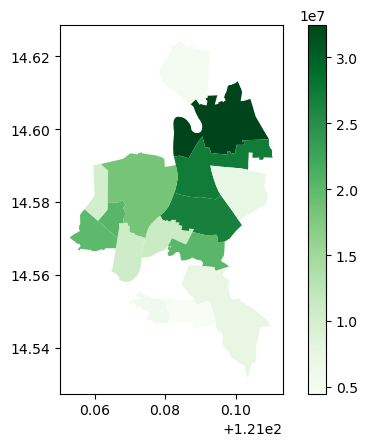

In [38]:
merged_gdf.plot(column='price' , cmap='Greens', legend=True)

<AxesSubplot:>

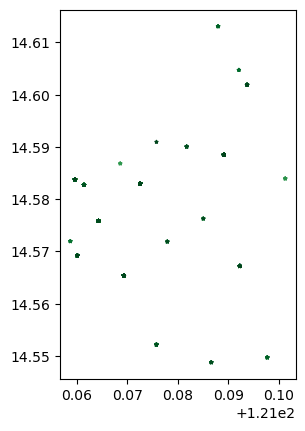

In [40]:
df["latitude"].unique()

array([14.582707, 14.582943, 14.583771, 14.588464, 14.569208, 14.575822,
       14.586827, 14.567197, 14.613073, 14.583952, 14.565391, 14.549724,
       14.576282, 14.552166, 14.571957, 14.571885, 14.548791, 14.601887,
       14.590053, 14.604707, 14.590946])

In [41]:
df

,link,unit/floor number,car spaces,bedrooms,baths,floor area,floor,condominium name,available from,cctv,...,recreational_avg_distance,living_facilities_avg_distance,religion_avg_distance,financial_avg_distance,specialized_stores_avg_distance,transportation_avg_distance,min_distance_to_fault_meters,flood_threat_level_5_yr,flood_threat_level_25_yr,barangay
0,https://www.lamudi.com.ph/studio-condo-unit-fo...,1418,1.0,1.0,1.0,21.00,14th,Olin at Jade Drive,01/12/2029,1.0,...,727.301374,NaN,641.414013,530.157167,NaN,694.474232,1004.493570,NaN,NaN,San Antonio
1,https://www.lamudi.com.ph/3-pdc-discount-promo...,20/F Unit H,NaN,2.0,2.0,104.00,NaN,The Fifth,31/01/2028,1.0,...,815.953990,NaN,745.930602,733.509458,NaN,737.371702,204.803147,1.0,2.0,Ugong
2,https://www.lamudi.com.ph/studio-condo-unit-fo...,NaN,NaN,1.0,1.0,30.00,NaN,Portico,NaN,1.0,...,874.281397,NaN,787.161658,528.008578,NaN,668.914147,1222.715434,NaN,NaN,NaN
3,https://www.lamudi.com.ph/for-sale-spacious-co...,NaN,1.0,1.0,2.0,108.00,NaN,The Velaris Residences,NaN,NaN,...,276.428038,237.357146,361.934975,413.126521,569.568536,562.111974,1888.879506,2.0,2.0,Rosario
4,https://www.lamudi.com.ph/studio-condo-unit-fo...,05F-0025,NaN,1.0,1.0,21.37,NaN,Spectrum,NaN,1.0,...,874.281397,NaN,787.161658,528.008578,NaN,668.914147,1222.715434,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,https://www.lamudi.com.ph/for-sale-195-sqm-wit...,NaN,NaN,3.0,NaN,195.00,NaN,NaN,NaN,NaN,...,853.373142,636.175641,989.100014,664.672521,NaN,723.393855,849.765102,NaN,NaN,Kapitolyo
1392,https://www.lamudi.com.ph/2-bedroom-condo-unit...,NaN,1.0,2.0,2.0,142.00,NaN,Parklinks Towers,NaN,1.0,...,NaN,NaN,648.274318,877.815613,931.479680,457.814363,2096.373238,1.0,2.0,Manggahan
1393,https://www.lamudi.com.ph/24-sqm-studio-condo-...,21W17,NaN,1.0,1.0,24.00,21,Cirrus Residences,23/10/2023,1.0,...,276.428038,237.357146,361.934975,413.126521,569.568536,562.111974,1888.879506,2.0,2.0,Rosario
1394,https://www.lamudi.com.ph/for-sale-1-bedroom-u...,Unit 16F,NaN,1.0,1.0,37.00,NaN,The Sapphire Bloc,23/10/2023,1.0,...,874.281397,NaN,787.161658,528.008578,NaN,668.914147,1222.715434,NaN,NaN,NaN


In [42]:
pasig

,ADM4_EN,ADM4_PCODE,ADM4_REF,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,AREA_SQKM,geometry,streetimage_count
0,Bagong Ilog,PH1307403001,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.044006,0.000102,1.212769,"POLYGON ((121.06826 14.57439, 121.06830 14.574...",15
1,Bagong Katipunan,PH1307403002,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.008178,0.000002,0.022305,"POLYGON ((121.07557 14.55938, 121.07565 14.559...",0
2,Bambang,PH1307403003,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.037444,0.000044,0.521039,"POLYGON ((121.08183 14.55734, 121.08205 14.557...",3
3,Buting,PH1307403004,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.025904,0.000029,0.348487,"POLYGON ((121.06733 14.55742, 121.06791 14.557...",5
4,Caniogan,PH1307403005,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.048018,0.000088,1.043965,"POLYGON ((121.07887 14.57603, 121.07900 14.575...",10
5,Dela Paz,PH1307403006,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.060903,0.000110,1.313738,"POLYGON ((121.09324 14.62132, 121.09371 14.621...",3
6,Kalawaan,PH1307403007,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.043051,0.000085,1.007688,"POLYGON ((121.08089 14.55377, 121.08153 14.553...",6
7,Kapasigan,PH1307403008,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.015499,0.000013,0.156590,"POLYGON ((121.07647 14.56461, 121.07650 14.564...",2
8,Kapitolyo,PH1307403009,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.042286,0.000085,1.017210,"POLYGON ((121.05816 14.57730, 121.05870 14.576...",2
9,Malinao,PH1307403010,None,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.026873,0.000020,0.241379,"POLYGON ((121.08060 14.55974, 121.08047 14.559...",2


### Pasig Buy

In [43]:
df = pd.read_csv('data/csv/pasig_buy_model_completed_data.csv')

array([  7500000,  27440000,   6433000,  38000000,   8602248,  15440000,
         3000000,  10859071,  32756000,  24898000,  25355000,  24987000,
        25013000,  25560000,  24871000,  25096000,  26795000,  24895000,
        26210000,  25371000,  25020000,  25403000,  24926000,  38930000,
        42464000,  24946000,  26202000,  25347000,  38789000,  13576000,
        14266000,  22230000,  17148000,  24158000,  18563000,  19958000,
        19699000,  22352000,  19188000,  18786000,  19641000,  21710000,
        21787000,  11124000,  14708000,  25308000,  24935000,   7583000,
        20868000,  22797000,  15309000,  27518000,  25197000,  15007000,
        14416000,  26185000,  15136000,  14964000,  15050000,  38906000,
        27055000,  39060000,  26127000,  14709000,  15656000,  27172000,
        14794000,  20468000,  22582000,  40061300,  21567000,  21094000,
        32256000,  24998000,  28063000,  44039000,  20111000,  25455000,
        13193856,  20679000,  20726000,  20341000, 

In [45]:
# Remove duplicates based on 'Column1' only
df = df.drop_duplicates(subset=['link'], keep='first')
print(df)

                                                   link unit/floor number  \
0     https://www.lamudi.com.ph/studio-condo-unit-fo...              1418   
1     https://www.lamudi.com.ph/3-pdc-discount-promo...       20/F Unit H   
2     https://www.lamudi.com.ph/studio-condo-unit-fo...               NaN   
3     https://www.lamudi.com.ph/for-sale-spacious-co...               NaN   
4     https://www.lamudi.com.ph/studio-condo-unit-fo...          05F-0025   
...                                                 ...               ...   
1391  https://www.lamudi.com.ph/for-sale-195-sqm-wit...               NaN   
1392  https://www.lamudi.com.ph/2-bedroom-condo-unit...               NaN   
1393  https://www.lamudi.com.ph/24-sqm-studio-condo-...             21W17   
1394  https://www.lamudi.com.ph/for-sale-1-bedroom-u...          Unit 16F   
1395  https://www.lamudi.com.ph/for-sale-2-bedroom-u...           Unit 5L   

      car spaces  bedrooms  baths  floor area floor        condominium name

In [46]:
properties_df = df
# Create a GeoDataFrame for properties
properties_gdf = gpd.GeoDataFrame(properties_df,
                                   geometry=gpd.points_from_xy(properties_df['longitude'],
                                                               properties_df['latitude']),
                                   crs='EPSG:4326')  # Specify the coordinate reference system

# Perform a spatial join
joined_gdf = gpd.sjoin(properties_gdf, pasig, how='inner', op='within')

# The 'ADM4_EN' column in 'joined_gdf' contains the city names
# You can create a new column in 'properties_df' to store the city information
properties_df['barangay'] = joined_gdf['ADM4_EN']
# Calculate the average property price per city
average_price_per_city = joined_gdf.groupby('ADM4_EN')['price'].mean().reset_index()

print(average_price_per_city)

         ADM4_EN         price
0    Bagong Ilog  1.038853e+07
1       Caniogan  1.102325e+07
2       Kalawaan  4.485925e+06
3      Kapitolyo  1.942063e+07
4      Manggahan  3.249278e+07
5       Maybunga  2.676250e+07
6         Oranbo  2.030625e+07
7   Pinagbuhatan  7.955097e+06
8        Rosario  2.763153e+07
9    San Antonio  1.016133e+07
10   San Joaquin  5.861090e+06
11    San Miguel  2.094952e+07
12   Santa Lucia  7.254350e+06
13      Santolan  5.143800e+06
14         Ugong  1.853226e+07


C:\Users\Daniel\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


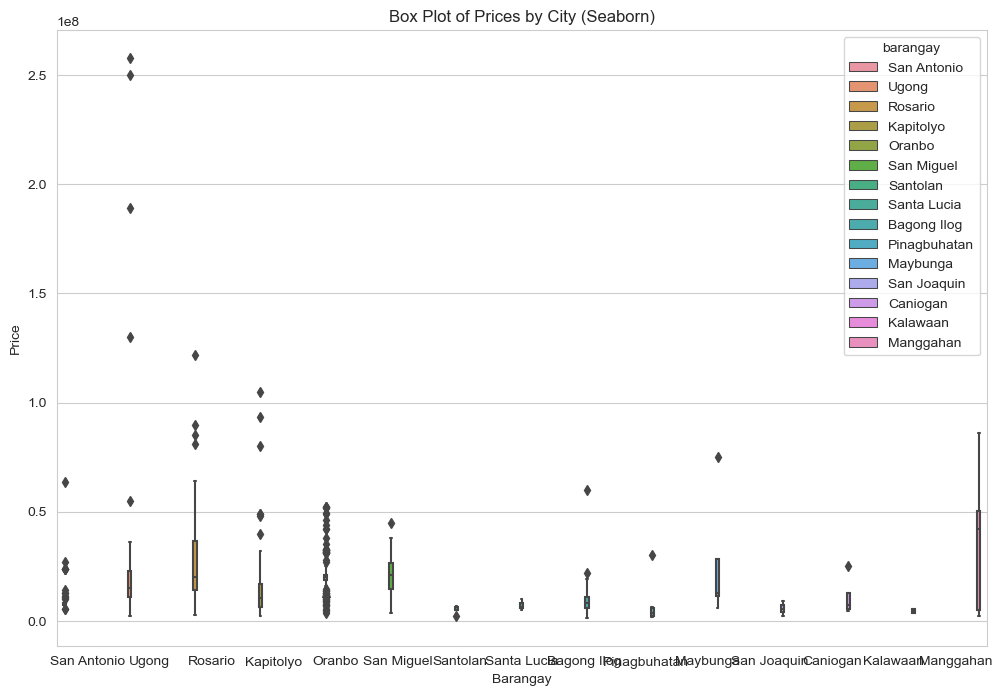

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with columns 'city_column' and 'price_column'
sns.set_style("whitegrid")
# Create a larger figure by adjusting the figsize parameter
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x='barangay', y='price', data=properties_df, hue='barangay')

# Customize the plot if needed (e.g., add labels, titles, etc.)
plt.xlabel("Barangay")
plt.ylabel("Price")
plt.title("Box Plot of Prices by City (Seaborn)")
plt.show()

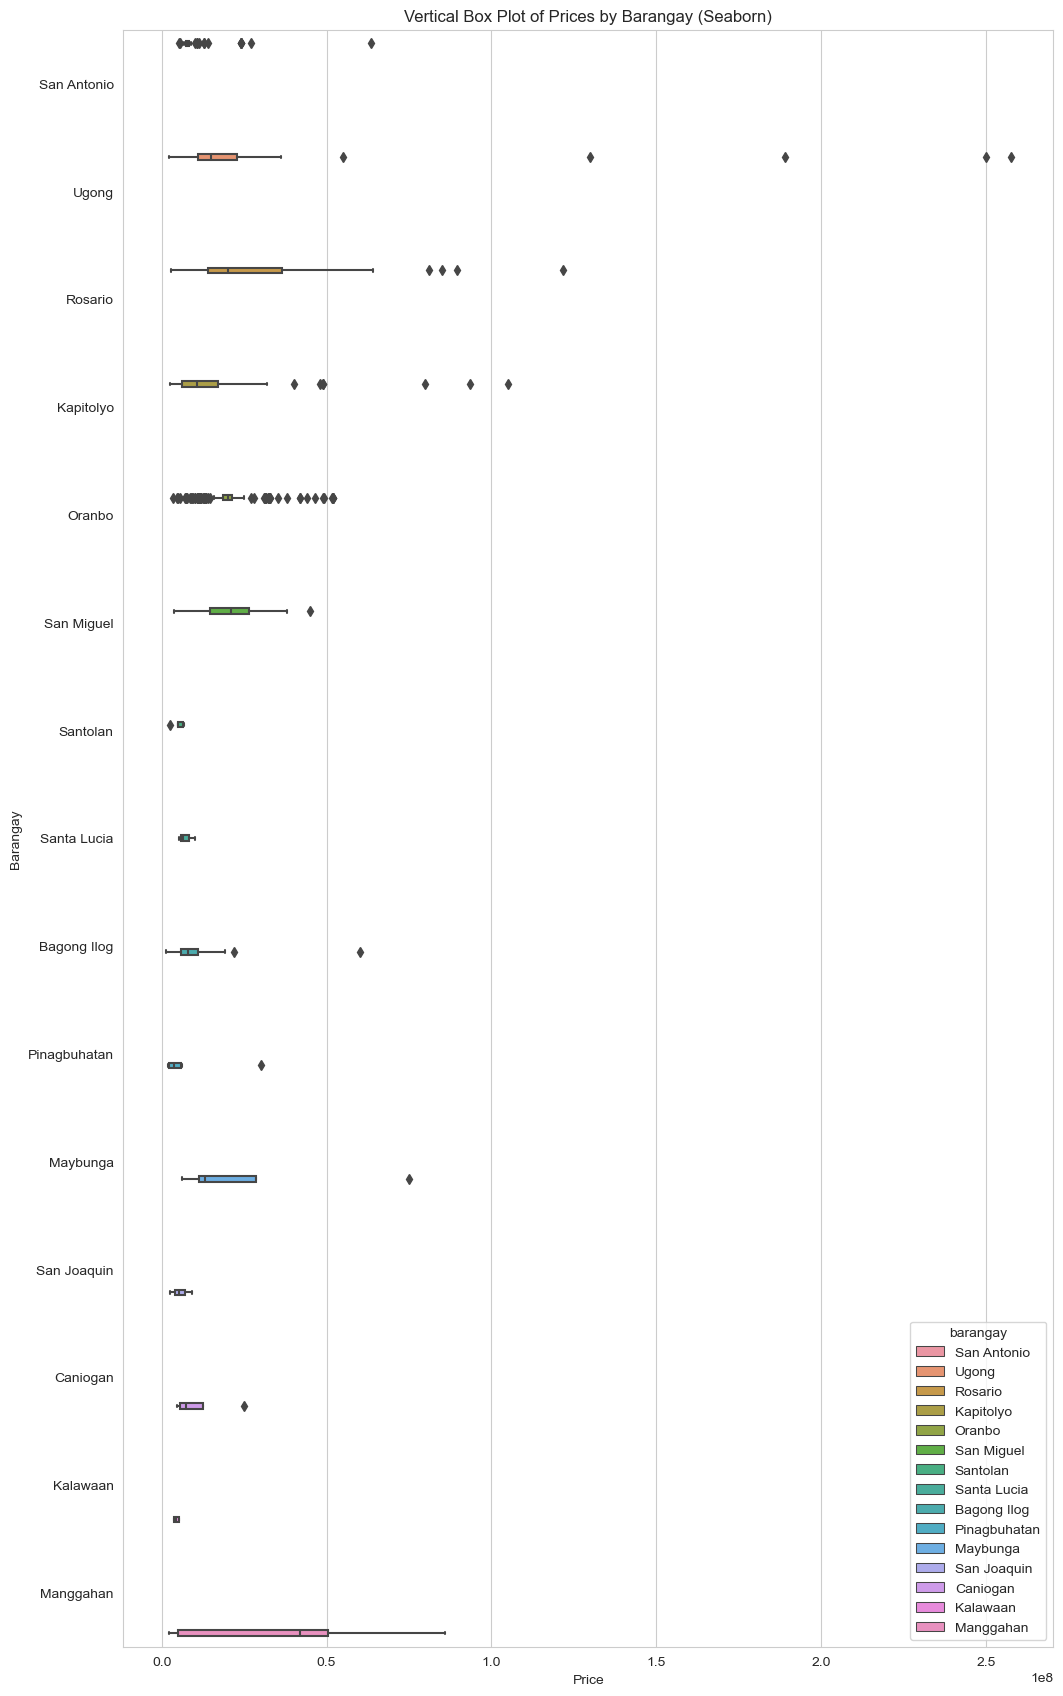

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
# Create a larger figure by adjusting the figsize parameter
fig, ax = plt.subplots(figsize=(12, 21))
sns.boxplot(x='price', y='barangay', data=properties_df, hue='barangay', dodge=True)  # Adjust width

plt.xlabel("Price")
plt.ylabel("Barangay")
plt.title("Vertical Box Plot of Prices by Barangay (Seaborn)")
plt.show()

### Pasig Rent

In [49]:
df = pd.read_csv('data/csv/pasig_rent_model_completed_data.csv')
# Remove duplicates based on 'Column1' only
df = df.drop_duplicates(subset=['link'], keep='first')
print(df)

                                                  link  building name  \
0    https://www.lamudi.com.ph/1-bedroom-royalton-t...            NaN   
1    https://www.lamudi.com.ph/the-royalton-capitol...            NaN   
2    https://www.lamudi.com.ph/1-bedroom-condo-unit...            NaN   
3    https://www.lamudi.com.ph/two-bedroom-penthous...            NaN   
4    https://www.lamudi.com.ph/3-bedrooms-for-lease...            NaN   
..                                                 ...            ...   
730  https://www.lamudi.com.ph/1-bedroom-unit-for-l...            NaN   
731  https://www.lamudi.com.ph/opl-for-lease-2-bedr...            NaN   
732  https://www.lamudi.com.ph/2br-condo-unit-for-r...            NaN   
733  https://www.lamudi.com.ph/ra0044-for-rent-spac...            NaN   
734  https://www.lamudi.com.ph/4-bedroom-house-with...            NaN   

    block and lot/unit/floor number classification fully furnished  \
0                               NaN            NaN   

In [50]:
properties_df = df
# Create a GeoDataFrame for properties
properties_gdf = gpd.GeoDataFrame(properties_df,
                                   geometry=gpd.points_from_xy(properties_df['longitude'],
                                                               properties_df['latitude']),
                                   crs='EPSG:4326')  # Specify the coordinate reference system

# Perform a spatial join
joined_gdf = gpd.sjoin(properties_gdf, pasig, how='inner', op='within')

# The 'ADM4_EN' column in 'joined_gdf' contains the city names
# create a new column in 'properties_df' to store the city information
properties_df['barangay'] = joined_gdf['ADM4_EN']
# Calculate the average property price per city
average_price_per_city = joined_gdf.groupby('ADM4_EN')['price'].mean().reset_index()

print(average_price_per_city)

         ADM4_EN          price
0    Bagong Ilog   33179.069767
1       Caniogan   32500.000000
2      Kapitolyo   55468.907563
3      Manggahan   42884.615385
4       Maybunga  150000.000000
5         Oranbo   69455.258824
6   Pinagbuhatan   65000.000000
7        Rosario   42520.000000
8    San Antonio   60363.246154
9    San Joaquin   22875.000000
10    San Miguel   84666.666667
11   Santa Lucia   23833.333333
12      Santolan   28111.111111
13         Ugong   97744.827586


C:\Users\Daniel\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


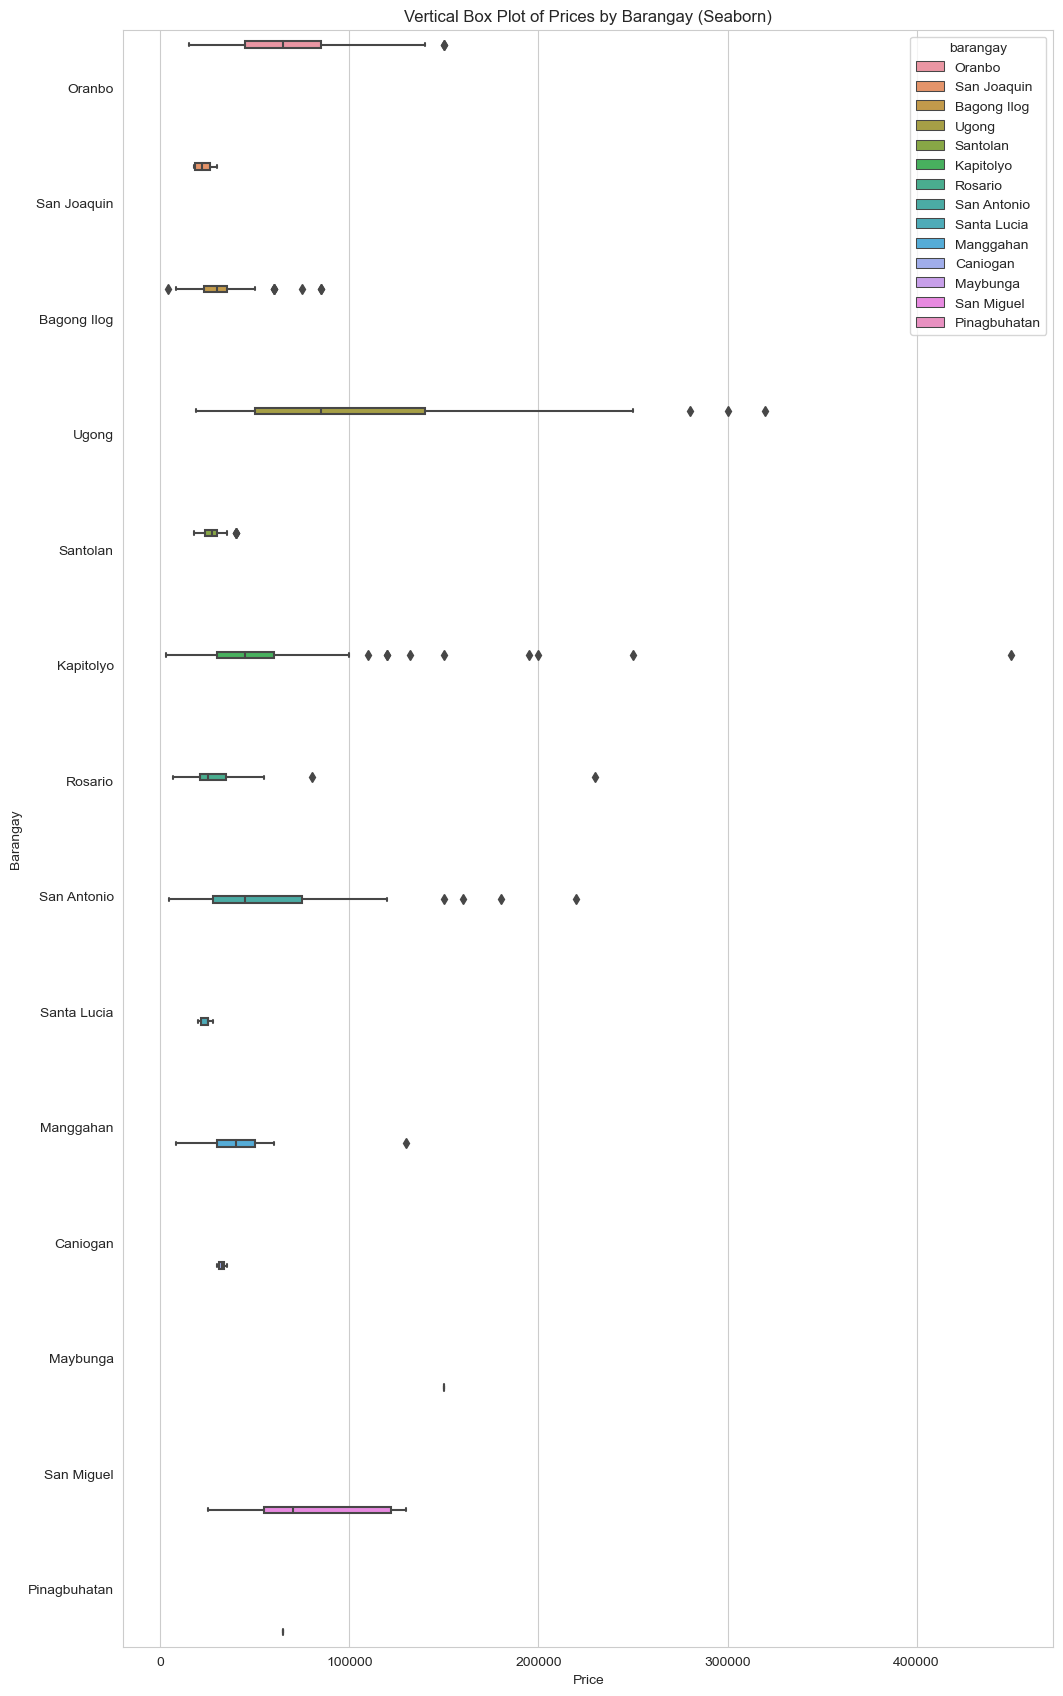

In [51]:


sns.set_style("whitegrid")
# Create a larger figure by adjusting the figsize parameter
fig, ax = plt.subplots(figsize=(12, 21))
sns.boxplot(x='price', y='barangay', data=properties_df, hue='barangay', dodge=True)  # Adjust width

plt.xlabel("Price")
plt.ylabel("Barangay")
plt.title("Vertical Box Plot of Prices by Barangay (Seaborn)")
plt.show()

NameError: name 'gdf' is not defined